In [1]:
! pip install ./python_files
from python_files import *
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()
# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available, training on: ", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

Processing c:\users\tbird\documents\github\06-665-psm-final-project\python_files
  Created wheel for python-files: filename=python_files-0.1.0-py3-none-any.whl size=1023 sha256=7e7cbee144643e552e0c98df62692c40f3ff0b372fb51f8e65b178e9edadb9c6
  Stored in directory: C:\Users\tbird\AppData\Local\Temp\pip-ephem-wheel-cache-2fs4tiou\wheels\ca\c1\3d\7f33f532b3f9eddd59bbd2ddd1f7583d50a6829274a8d07efa
Successfully built python-files
  Attempting uninstall: python-files
    Found existing installation: python-files 0.1.0
    Uninstalling python-files-0.1.0:
      Successfully uninstalled python-files-0.1.0


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


GPU is available, training on:  NVIDIA GeForce RTX 2070 Super with Max-Q Design


# NN Training and Testing

### Getting data for the NN training and testing

In [2]:
# loading data from saved folder
solutions = np.load("./saved/100_solutions.npy")
F_ag_array = np.load("./saved/100_F_ag.npy")
test_solutions = np.load("./saved/10test_solutions.npy")
test_F_ag_array = np.load("./saved/10test_F_ag.npy")
num_timesteps = 500
# Concatenating training data before preprocessing
solutions_w_F_ag = np.concatenate((solutions, F_ag_array.reshape(100,1,num_timesteps)), axis=1)
# Preprocessing training data
train_data = data_preprocessing(solutions_w_F_ag, N = 100, num_timesteps = num_timesteps, batch_size = 1, shuffle = False)
print("Training data preprocessing done")
# Concatenating test data before preprocessing
test_solutions_w_F_ag = np.concatenate((test_solutions, test_F_ag_array.reshape(10,1,num_timesteps)), axis=1)
# Preprocessing test data
test_data = data_preprocessing(test_solutions_w_F_ag, N = 10, num_timesteps = num_timesteps, batch_size = 1, shuffle = False)
print("Test data preprocessing done")

pre-processing data with N = 100
Training data preprocessing done
pre-processing data with N = 10
Test data preprocessing done


### The following block only needs to be used if new data is needed

In [3]:

# N = 100
# solutions_name = str(N) + "_solutions.npy"
# F_ag_array_name = str(N) + "_F_ag.npy"
# save_dir = "./saved"
# os.makedirs (save_dir, exist_ok=True)

# num_timesteps = 500
# train_random_inputs = generate_inputs (N)
# solutions, F_ag_array = generate_ode_data(train_random_inputs, num_timesteps)

# print ("="*50)
# print ("Saved: ")
# print (f"{solutions_name}: {solutions.shape}")
# print (f"{F_ag_array_name}: {F_ag_array.shape}")
# print ("="*50)

# # SAVE
# np.save (join(save_dir, solutions_name), solutions)
# np.save (join(save_dir, F_ag_array_name), F_ag_array)

# # PLOT
# plot_ode_solutions (solutions)
# plot_input_output(F_ag_array, solutions, N)


### Training and test the NN (2 hidden layers, 64 neurons, 20 epochs)

Train epoch: 0
Epoch 0 | Epoch mean training loss = 27.340330867402333
Test epoch: 0
Epoch: {0} Total test loss for set 0 is 34.670169623941185


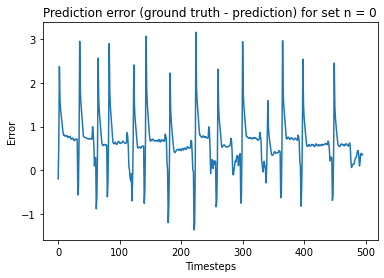

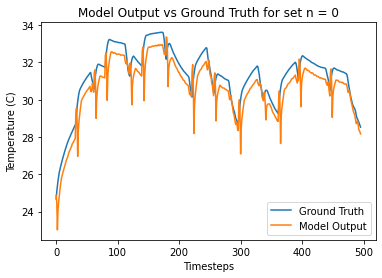

Epoch: {0} Total test loss for set 1 is 33.33242946680635


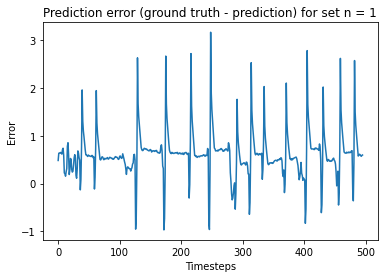

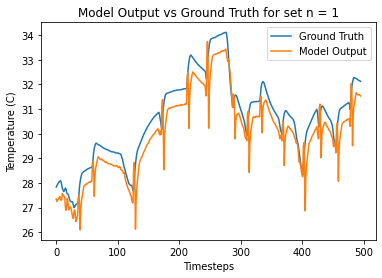

Epoch: {0} Total test loss for set 2 is 37.15675103813783


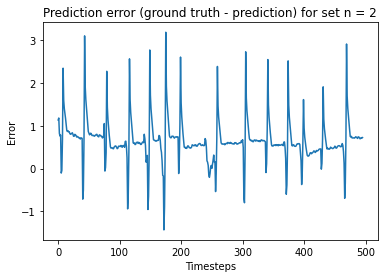

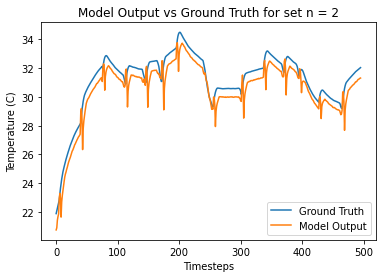

Epoch: {0} Total test loss for set 3 is 32.36731902860142


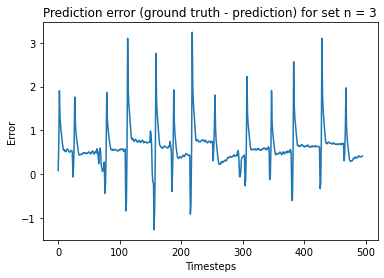

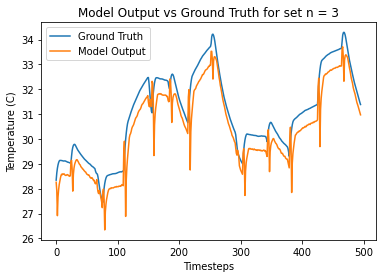

Epoch: {0} Total test loss for set 4 is 32.61393321834136


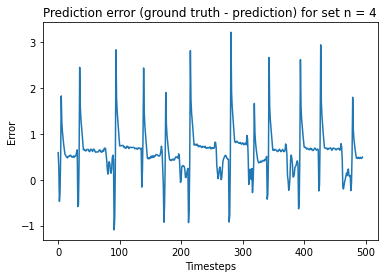

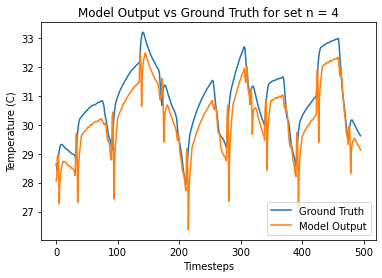

Epoch: {0} Total test loss for set 5 is 29.49550132729821


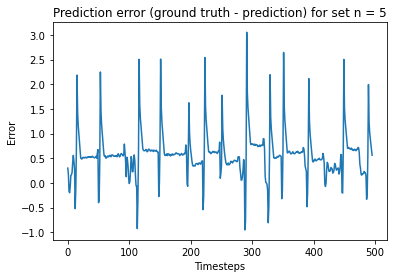

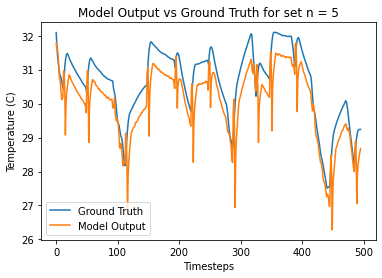

Epoch: {0} Total test loss for set 6 is 35.92989575089585


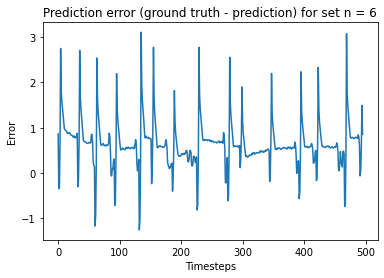

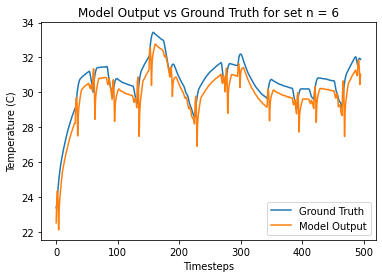

Epoch: {0} Total test loss for set 7 is 33.32556554011039


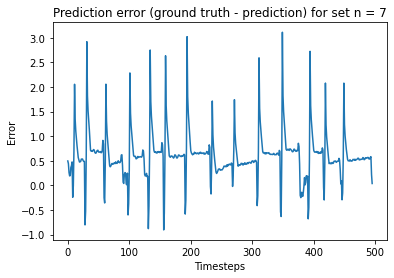

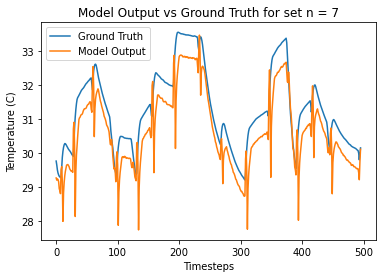

Epoch: {0} Total test loss for set 8 is 33.64227346432113


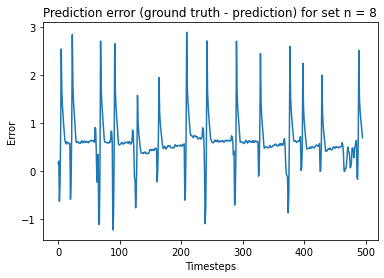

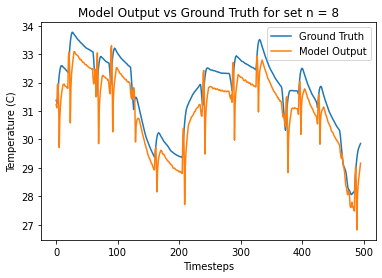

Epoch: {0} Total test loss for set 9 is 37.61364115319093


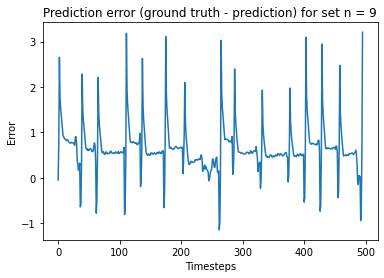

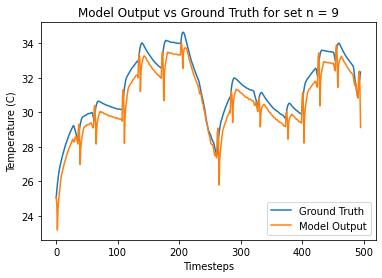

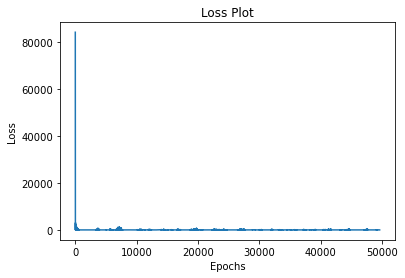

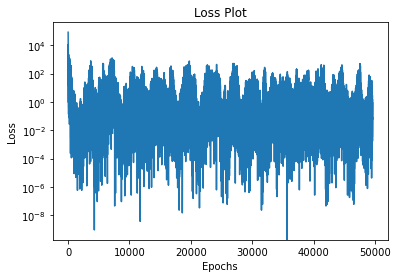

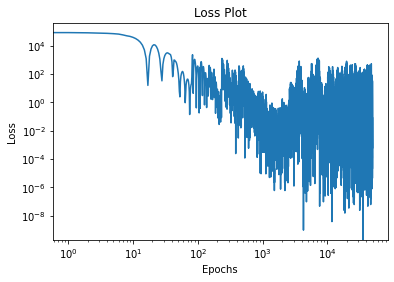

Train epoch: 1
Epoch 1 | Epoch mean training loss = 16.319184075314514
Test epoch: 1
Epoch: {1} Total test loss for set 0 is 3.4156516436487436


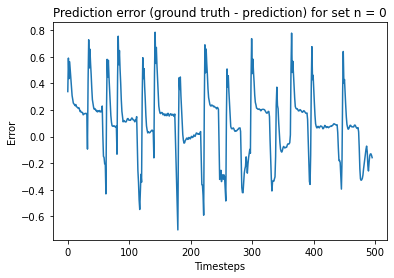

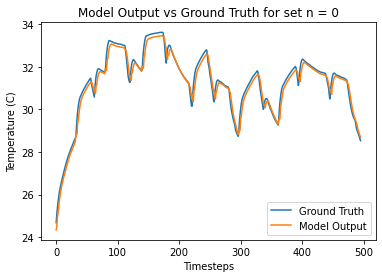

Epoch: {1} Total test loss for set 1 is 2.930477552395314


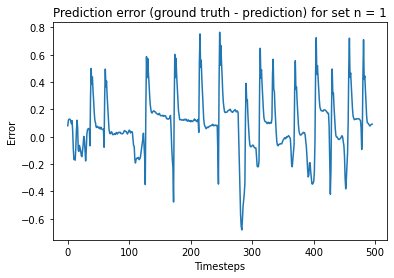

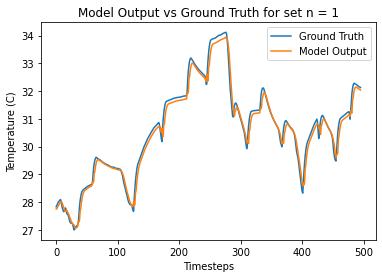

Epoch: {1} Total test loss for set 2 is 3.355662983125076


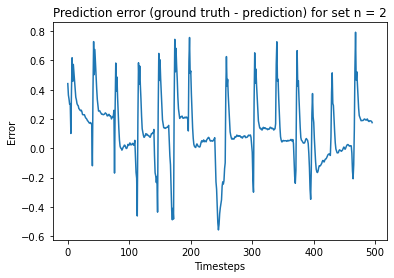

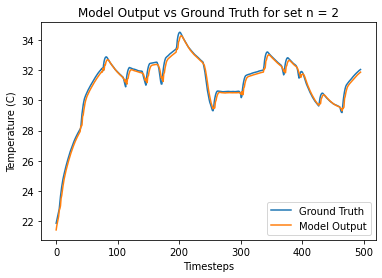

Epoch: {1} Total test loss for set 3 is 2.7153574165171013


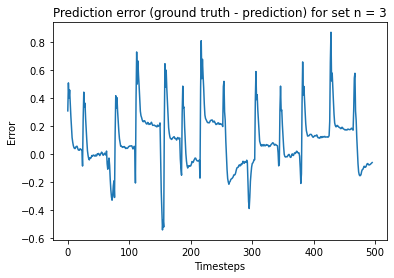

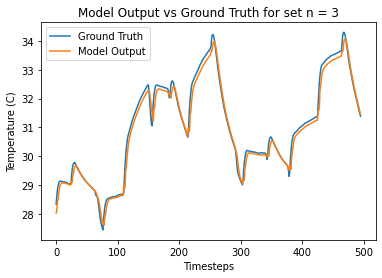

Epoch: {1} Total test loss for set 4 is 3.153383270113077


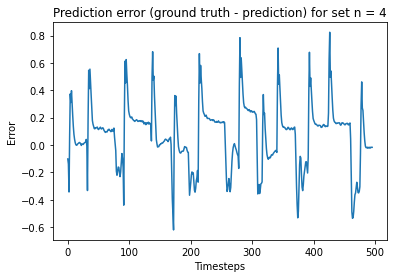

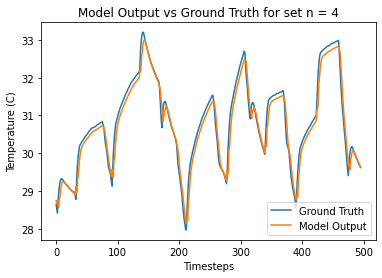

Epoch: {1} Total test loss for set 5 is 2.650536624269774


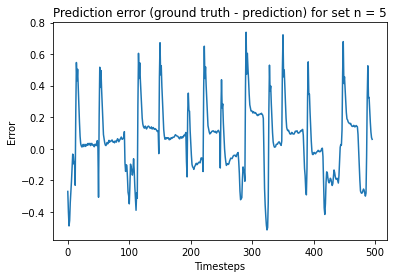

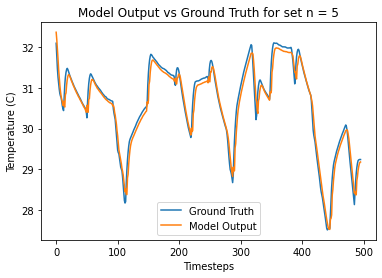

Epoch: {1} Total test loss for set 6 is 3.298842102524101


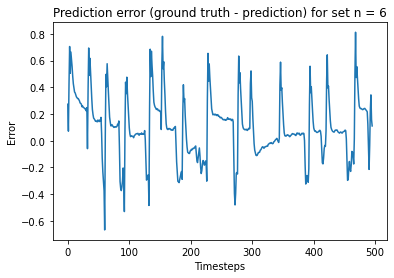

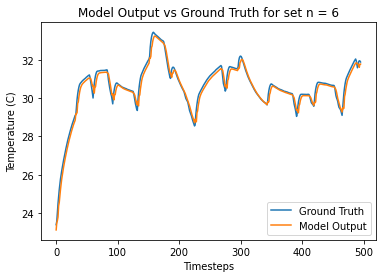

Epoch: {1} Total test loss for set 7 is 2.9354874409970106


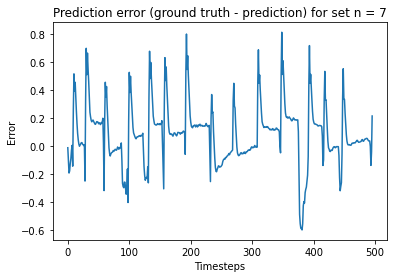

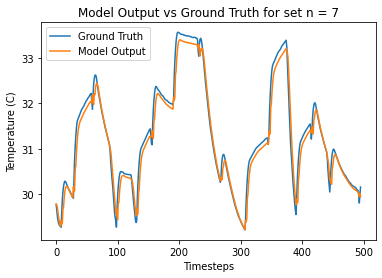

Epoch: {1} Total test loss for set 8 is 2.8366420728364234


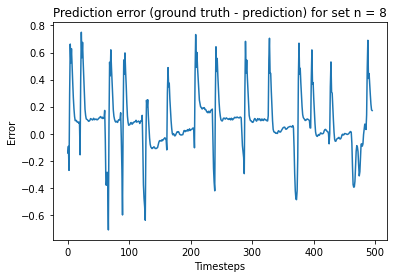

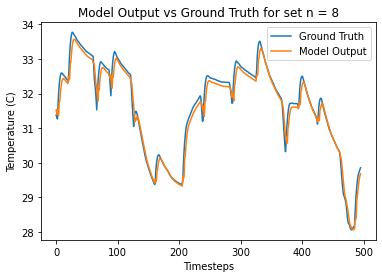

Epoch: {1} Total test loss for set 9 is 3.4834015179725855


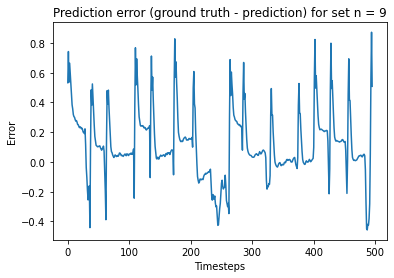

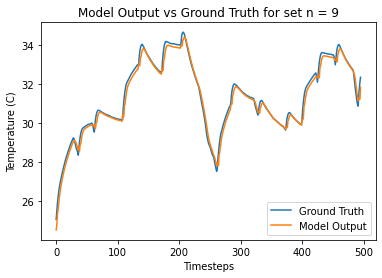

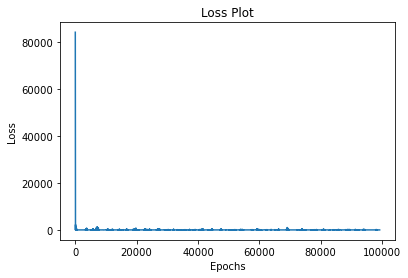

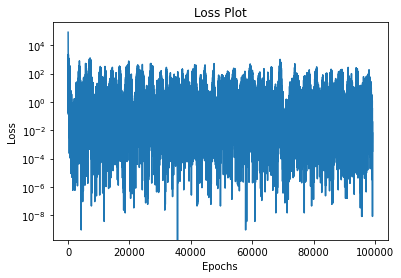

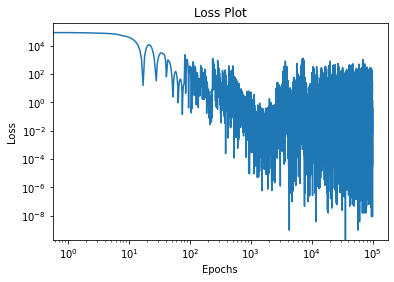

Train epoch: 2
Epoch 2 | Epoch mean training loss = 12.066788492186179
Test epoch: 2
Epoch: {2} Total test loss for set 0 is 14.753116959240288


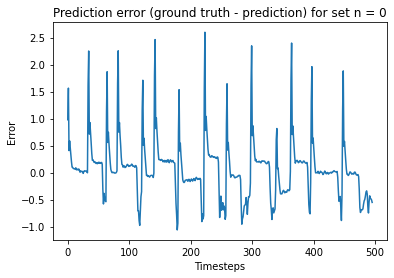

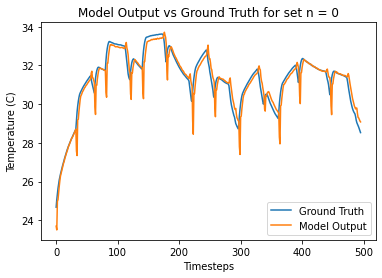

Epoch: {2} Total test loss for set 1 is 13.670549753913656


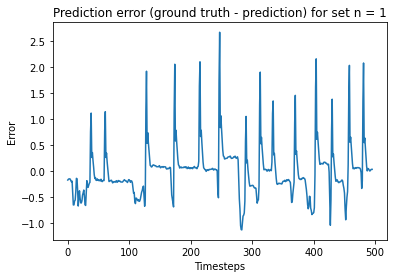

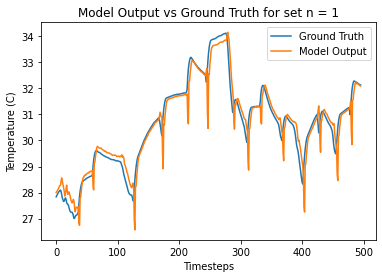

Epoch: {2} Total test loss for set 2 is 13.734822024297902


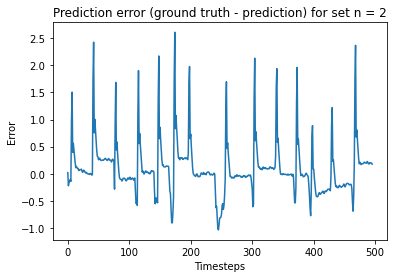

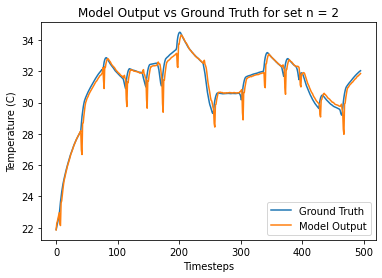

Epoch: {2} Total test loss for set 3 is 12.022358955041039


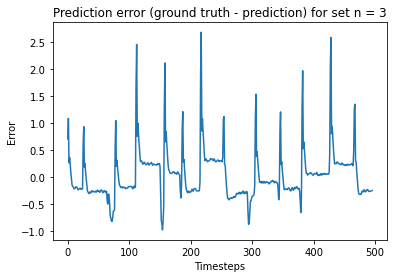

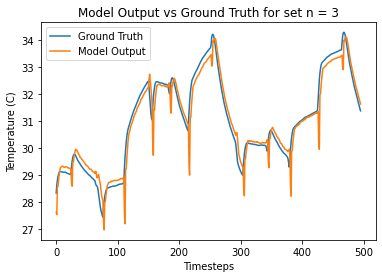

Epoch: {2} Total test loss for set 4 is 13.743363007173736


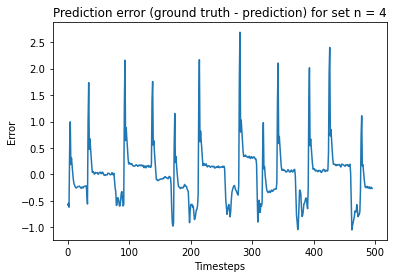

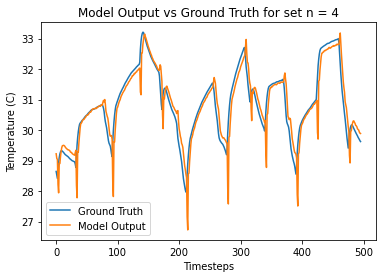

Epoch: {2} Total test loss for set 5 is 12.238992933297236


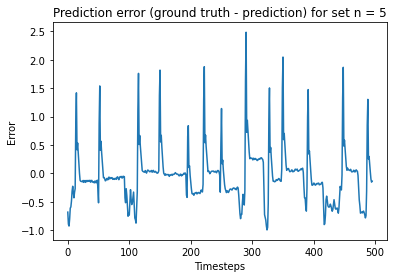

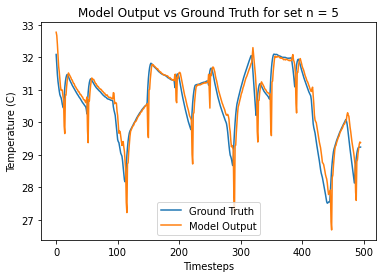

Epoch: {2} Total test loss for set 6 is 13.973235494747916


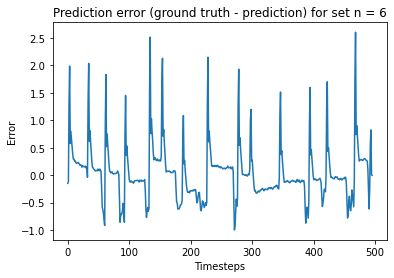

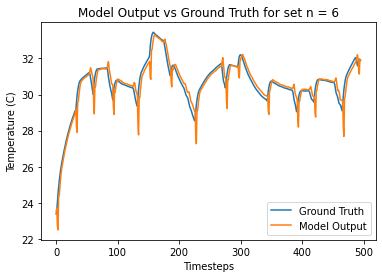

Epoch: {2} Total test loss for set 7 is 13.254751471738533


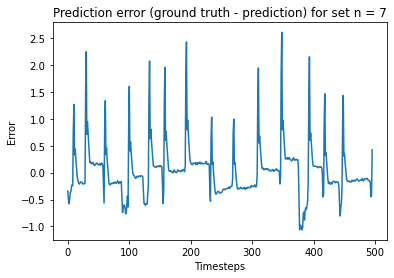

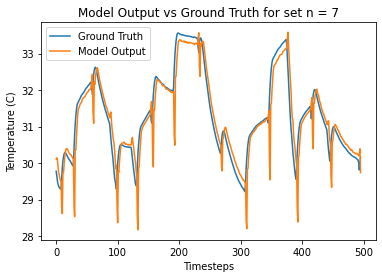

Epoch: {2} Total test loss for set 8 is 12.83281339546025


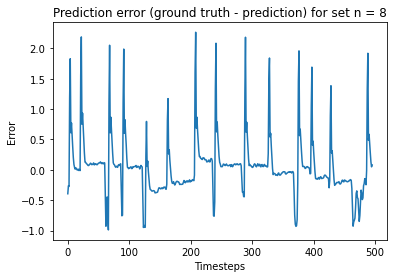

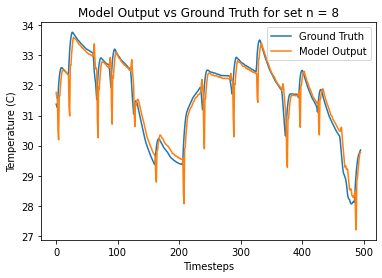

Epoch: {2} Total test loss for set 9 is 16.10235741588223


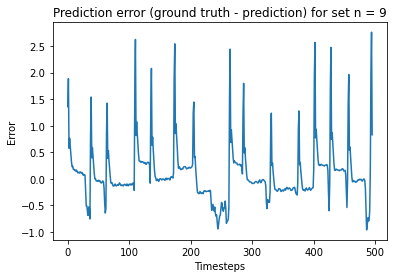

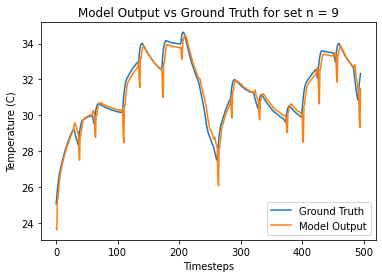

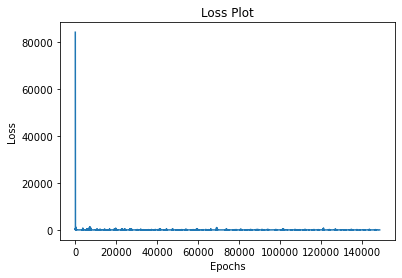

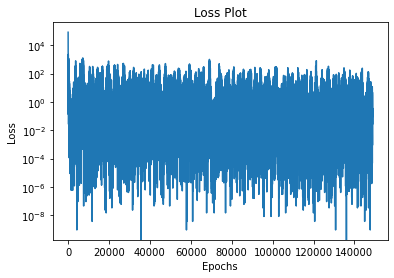

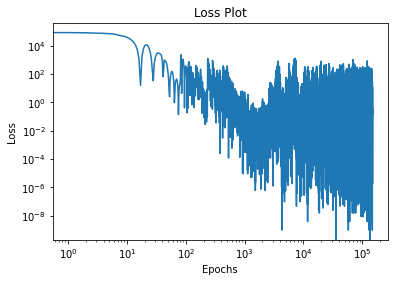

Train epoch: 3
Epoch 3 | Epoch mean training loss = 9.883651385903883
Test epoch: 3
Epoch: {3} Total test loss for set 0 is 34.04631557278335


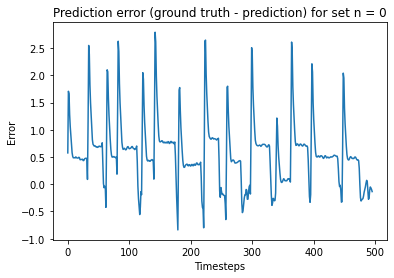

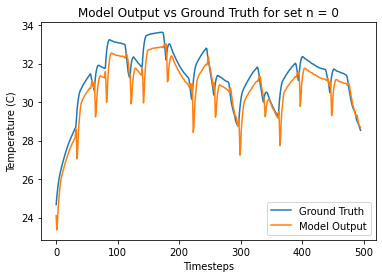

Epoch: {3} Total test loss for set 1 is 30.13059336306527


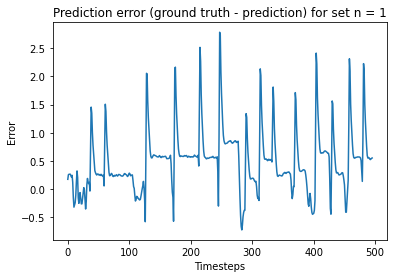

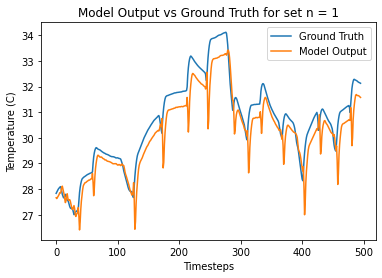

Epoch: {3} Total test loss for set 2 is 35.45314498849772


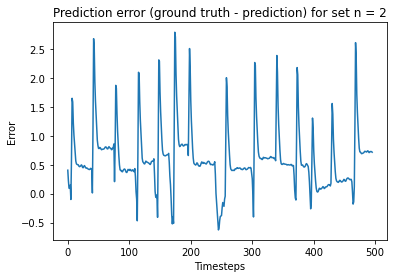

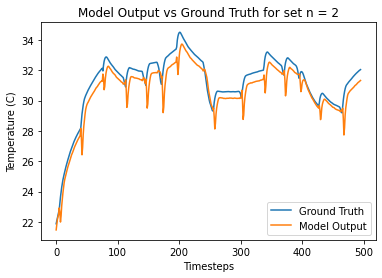

Epoch: {3} Total test loss for set 3 is 30.501651408847977


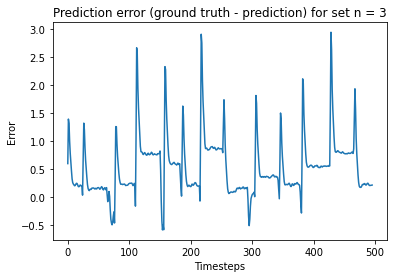

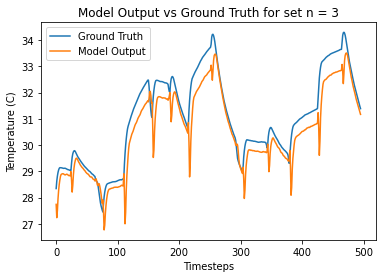

Epoch: {3} Total test loss for set 4 is 30.38331586846603


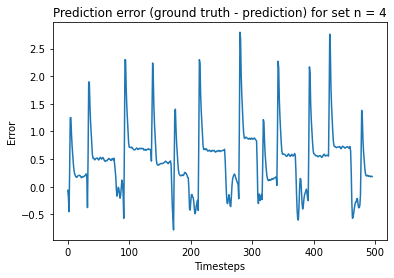

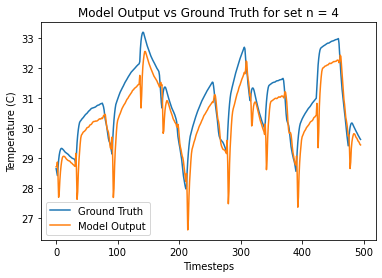

Epoch: {3} Total test loss for set 5 is 25.304959504192215


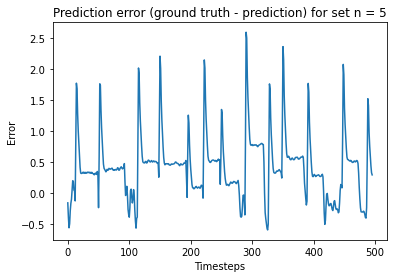

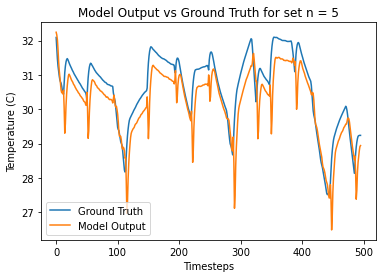

Epoch: {3} Total test loss for set 6 is 31.633655206698688


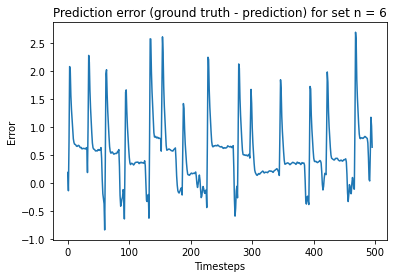

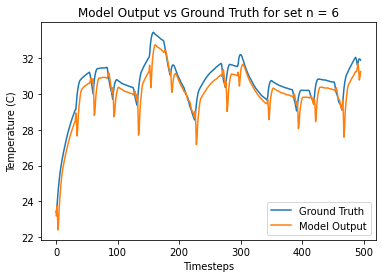

Epoch: {3} Total test loss for set 7 is 31.622497720776845


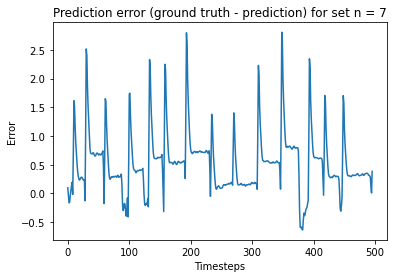

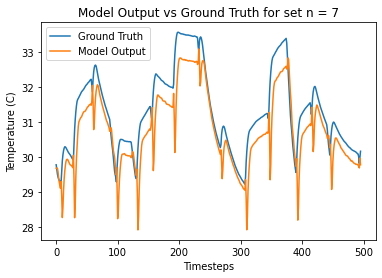

Epoch: {3} Total test loss for set 8 is 32.475998725382865


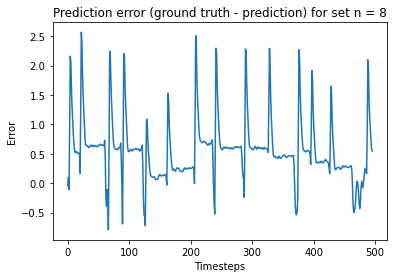

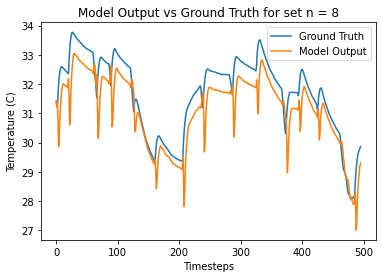

Epoch: {3} Total test loss for set 9 is 38.334036503975675


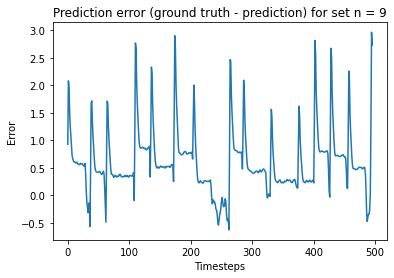

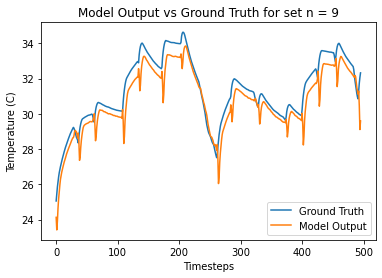

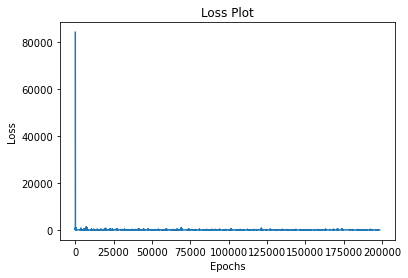

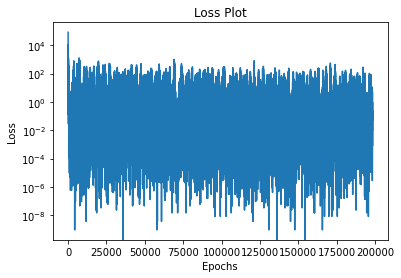

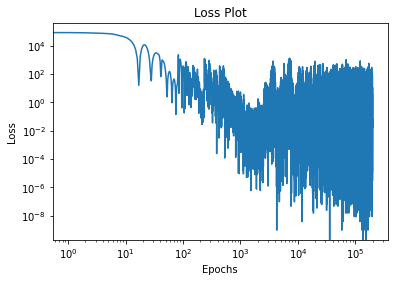

Train epoch: 4
Epoch 4 | Epoch mean training loss = 8.577942946184956
Test epoch: 4
Epoch: {4} Total test loss for set 0 is 1.1009358673356473


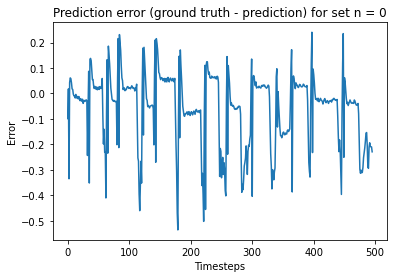

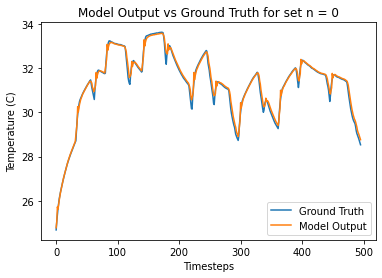

Epoch: {4} Total test loss for set 1 is 1.062078346153721


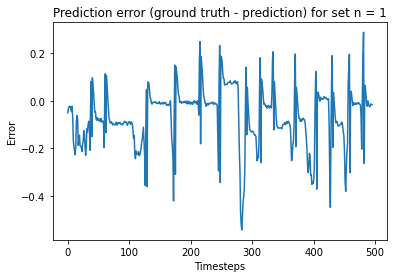

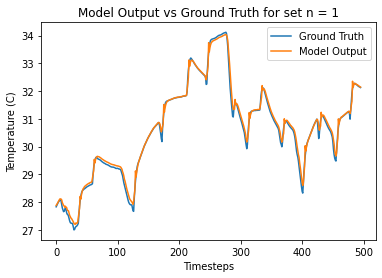

Epoch: {4} Total test loss for set 2 is 0.873245231400244


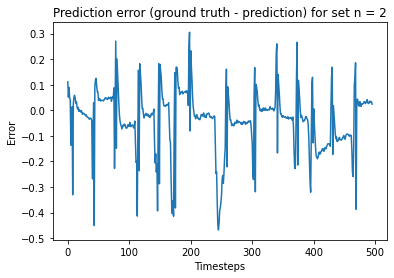

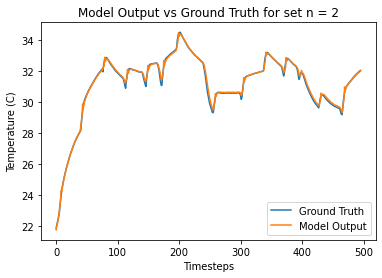

Epoch: {4} Total test loss for set 3 is 0.8449694023991935


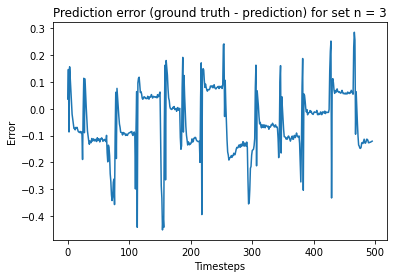

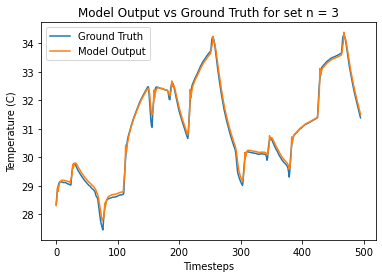

Epoch: {4} Total test loss for set 4 is 1.2225133769545984


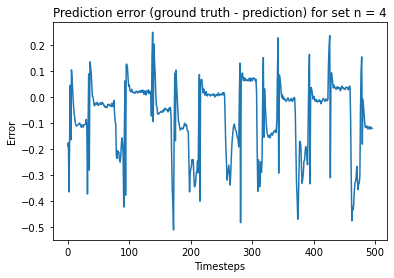

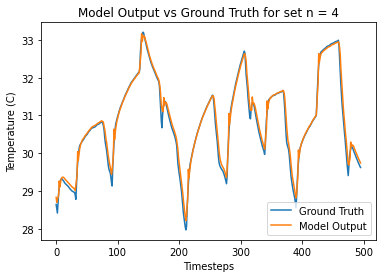

Epoch: {4} Total test loss for set 5 is 1.136134166199307


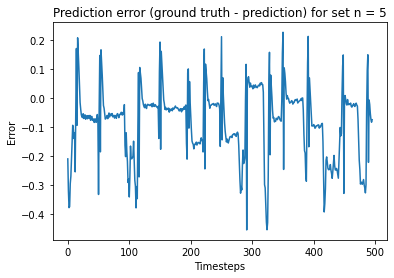

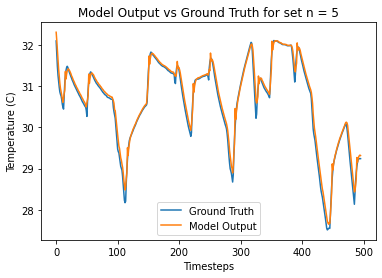

Epoch: {4} Total test loss for set 6 is 1.0710866331051627


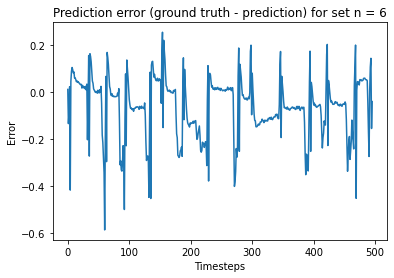

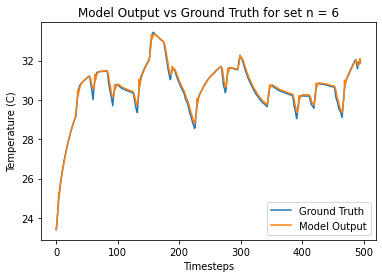

Epoch: {4} Total test loss for set 7 is 0.9988046665761952


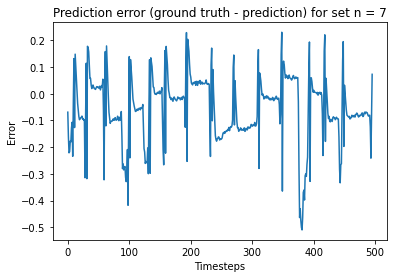

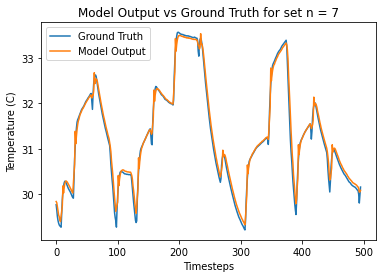

Epoch: {4} Total test loss for set 8 is 0.9581118142706562


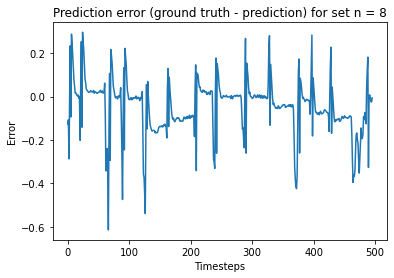

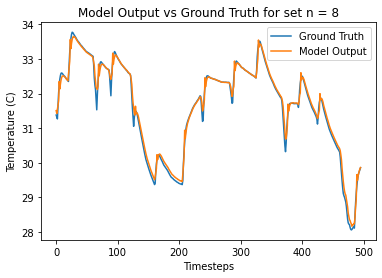

Epoch: {4} Total test loss for set 9 is 0.9858369248966614


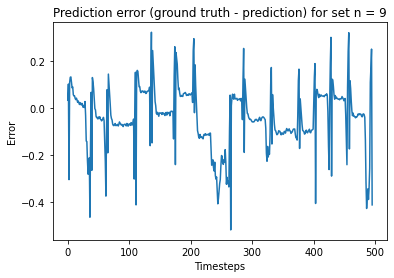

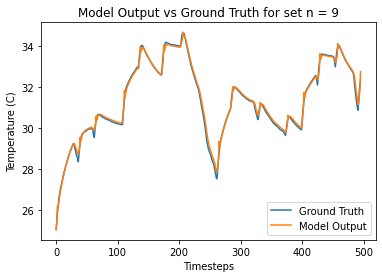

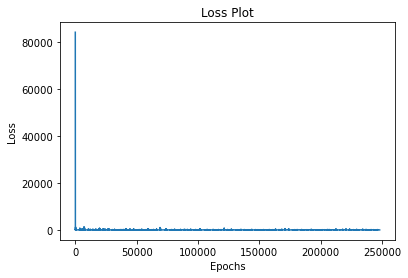

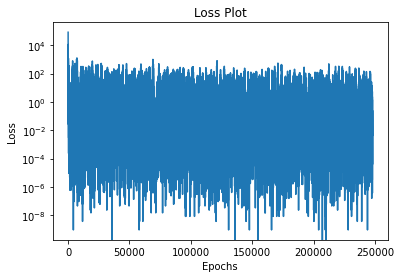

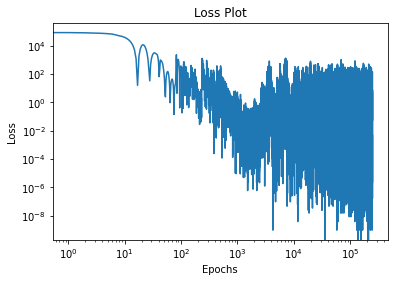

Train epoch: 5
Epoch 5 | Epoch mean training loss = 7.626019651081926
Test epoch: 5
Epoch: {5} Total test loss for set 0 is 35.06011388720945


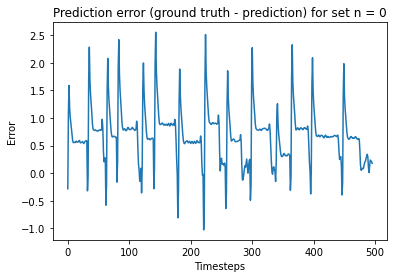

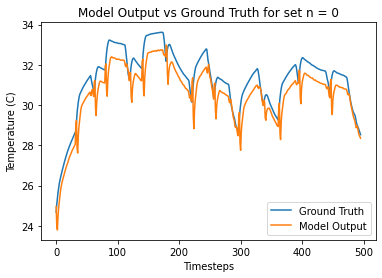

Epoch: {5} Total test loss for set 1 is 32.246209862818944


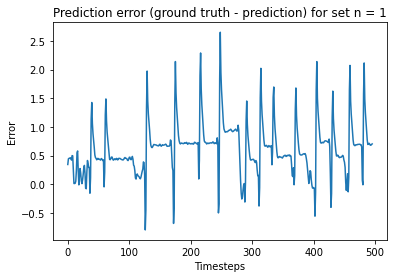

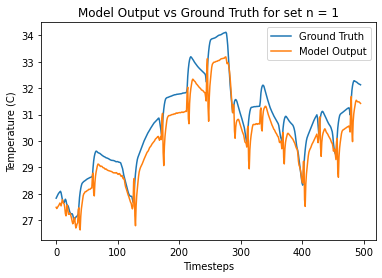

Epoch: {5} Total test loss for set 2 is 37.50634106594976


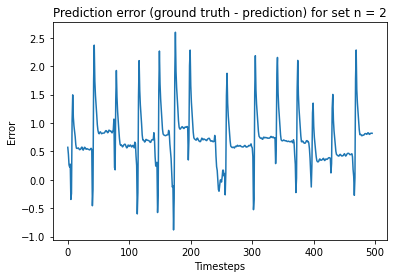

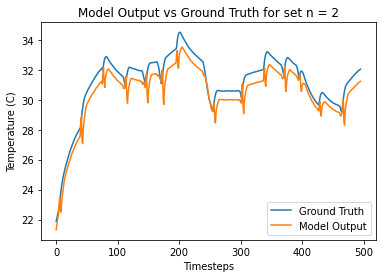

Epoch: {5} Total test loss for set 3 is 33.527011398013585


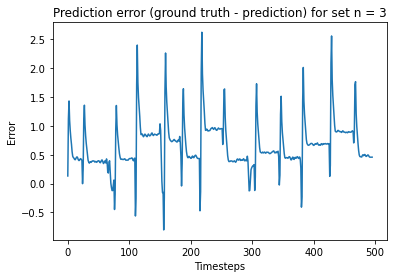

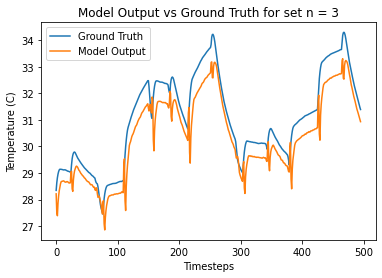

Epoch: {5} Total test loss for set 4 is 32.33457130582742


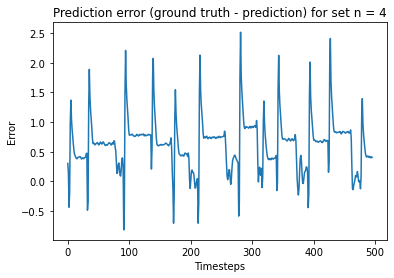

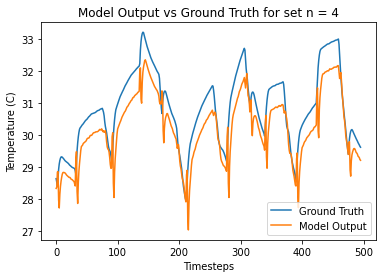

Epoch: {5} Total test loss for set 5 is 28.223006564208976


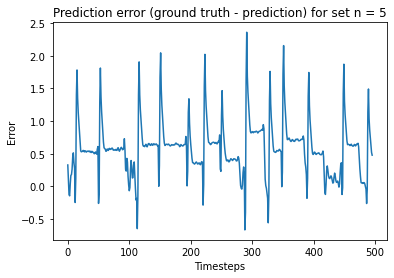

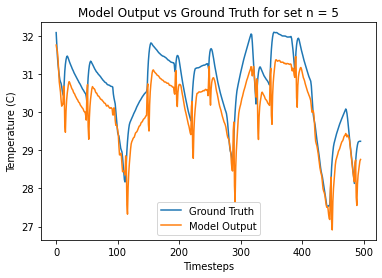

Epoch: {5} Total test loss for set 6 is 33.308255217598536


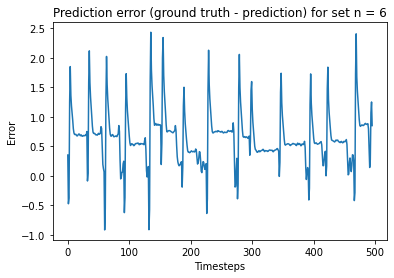

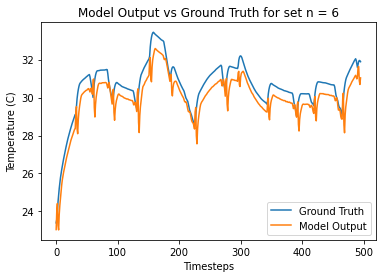

Epoch: {5} Total test loss for set 7 is 34.402402330897914


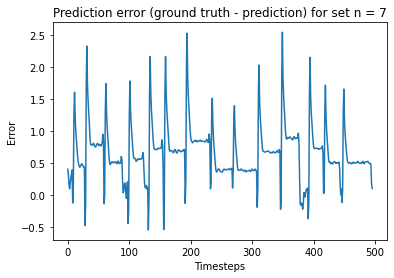

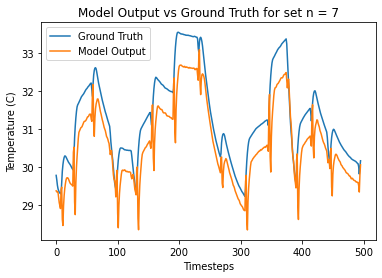

Epoch: {5} Total test loss for set 8 is 36.44371386745574


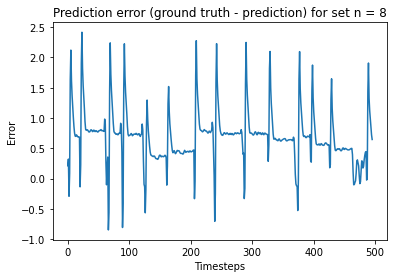

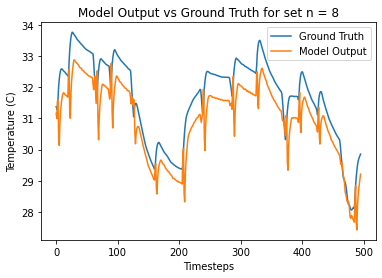

Epoch: {5} Total test loss for set 9 is 39.36505076488257


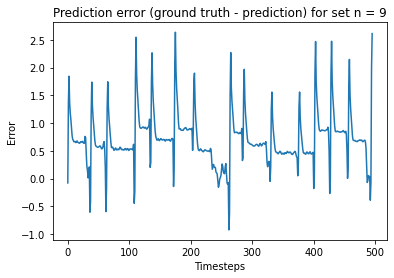

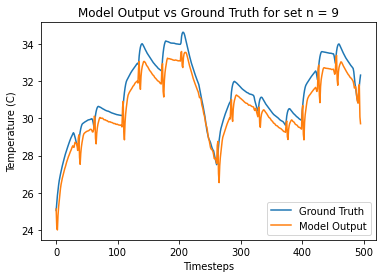

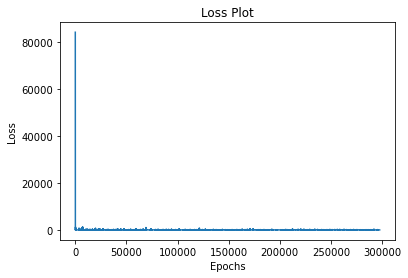

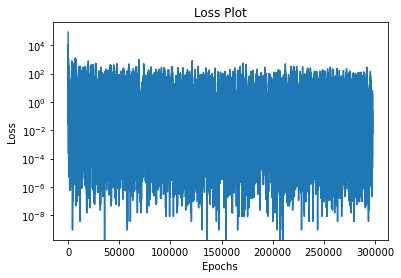

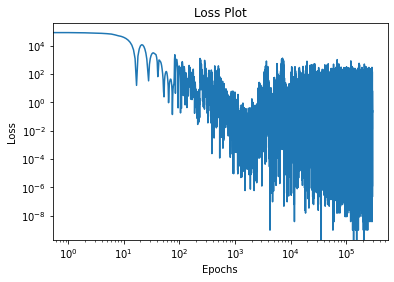

Train epoch: 6
Epoch 6 | Epoch mean training loss = 6.955550393607196
Test epoch: 6
Epoch: {6} Total test loss for set 0 is 42.066183945257215


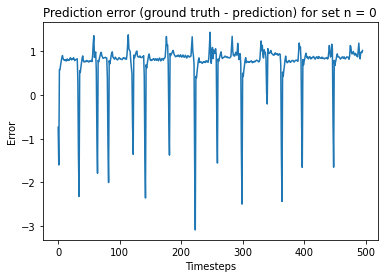

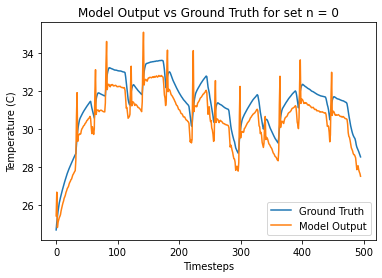

Epoch: {6} Total test loss for set 1 is 45.909091420760376


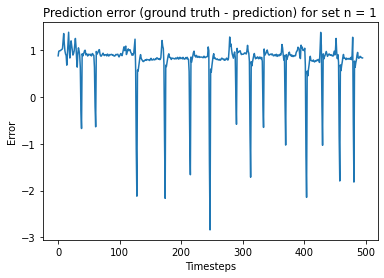

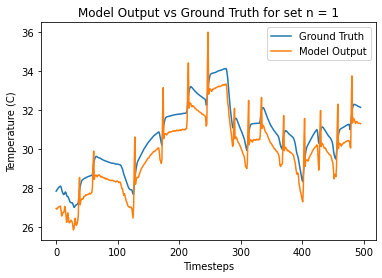

Epoch: {6} Total test loss for set 2 is 45.32245221001189


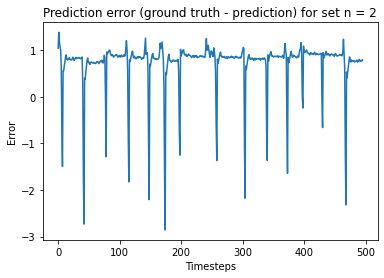

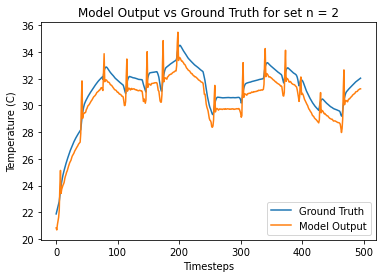

Epoch: {6} Total test loss for set 3 is 45.18194073281539


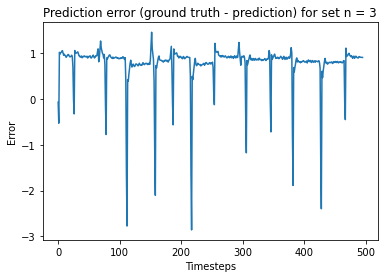

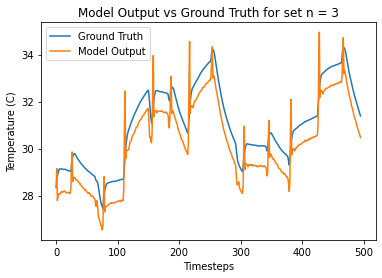

Epoch: {6} Total test loss for set 4 is 45.226658849354195


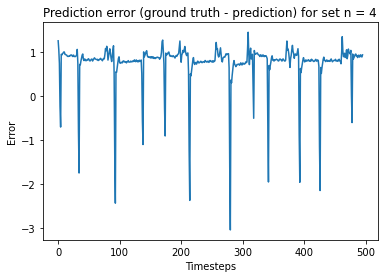

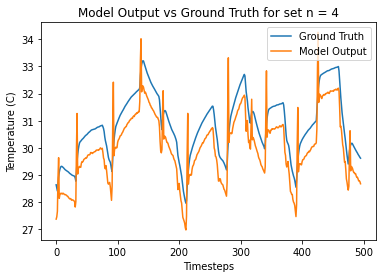

Epoch: {6} Total test loss for set 5 is 45.465231673264064


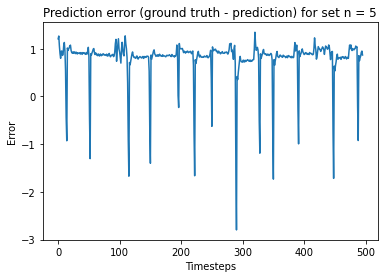

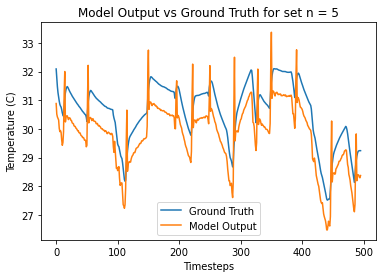

Epoch: {6} Total test loss for set 6 is 45.925608029815656


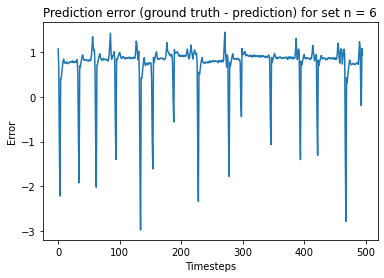

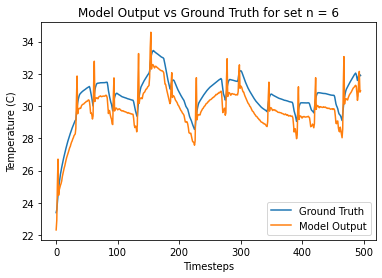

Epoch: {6} Total test loss for set 7 is 45.6516062523465


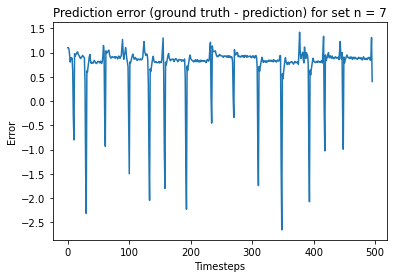

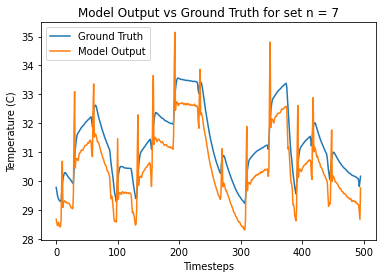

Epoch: {6} Total test loss for set 8 is 46.27619846713956


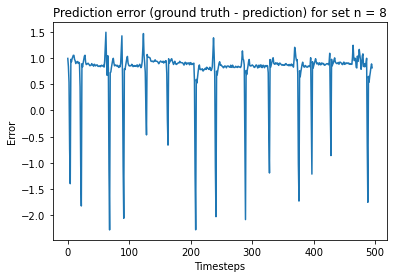

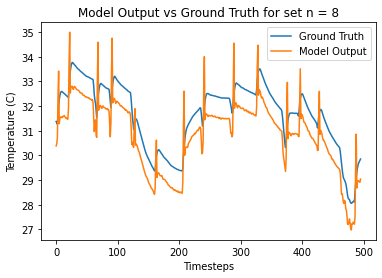

Epoch: {6} Total test loss for set 9 is 47.20379895045352


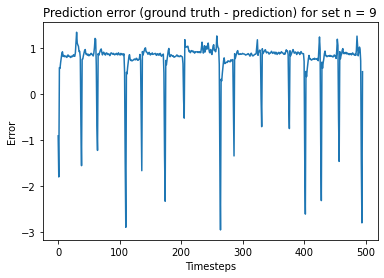

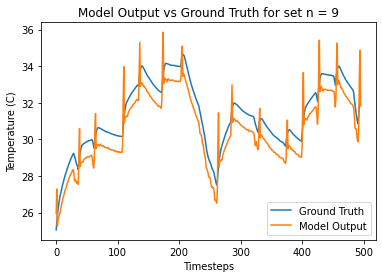

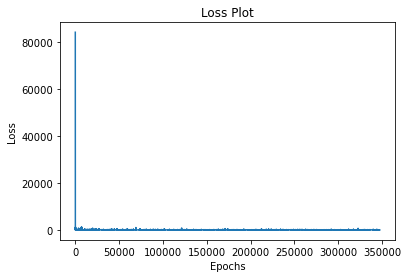

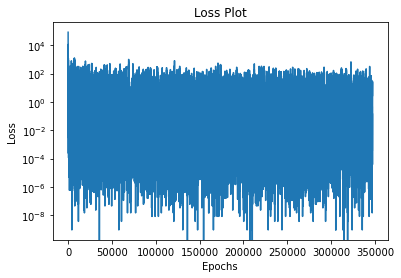

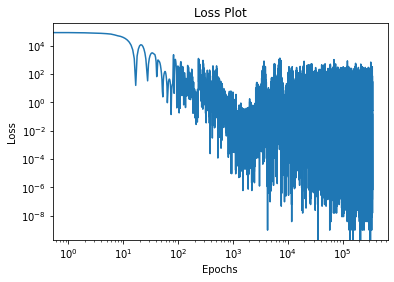

Train epoch: 7
Epoch 7 | Epoch mean training loss = 6.4327182296443715
Test epoch: 7
Epoch: {7} Total test loss for set 0 is 3.685810354258865


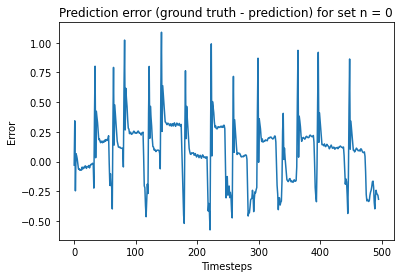

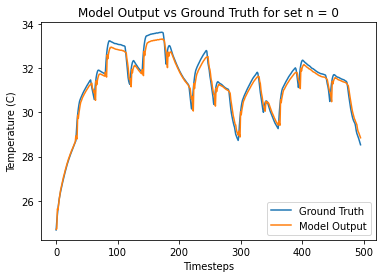

Epoch: {7} Total test loss for set 1 is 3.564309979761019


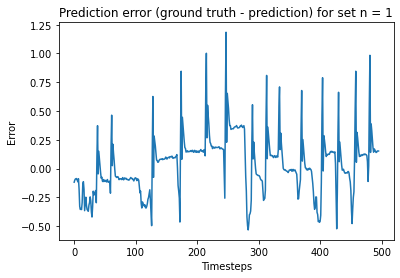

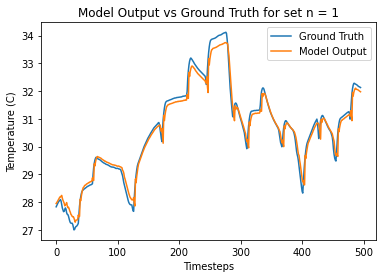

Epoch: {7} Total test loss for set 2 is 3.6649854390854015


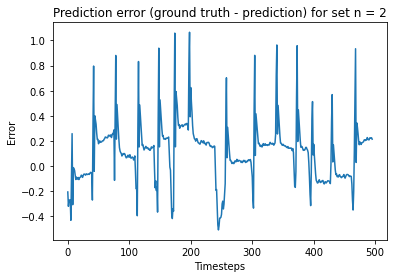

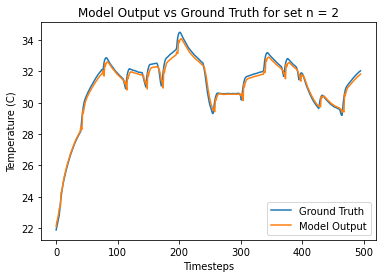

Epoch: {7} Total test loss for set 3 is 3.4155128171012734


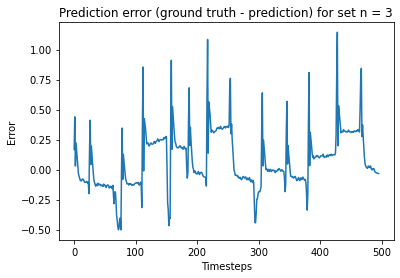

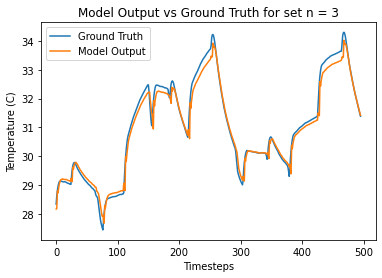

Epoch: {7} Total test loss for set 4 is 3.401527289965162


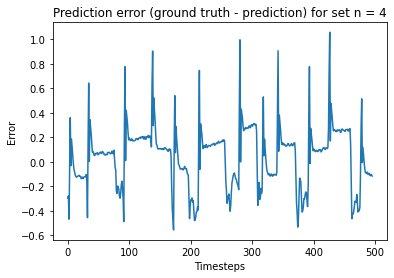

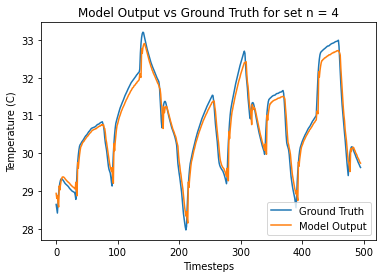

Epoch: {7} Total test loss for set 5 is 2.8331523007445942


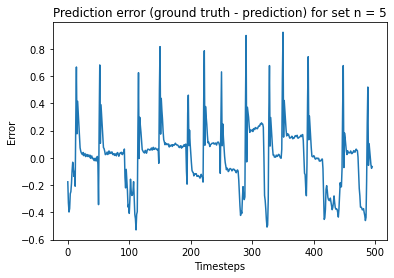

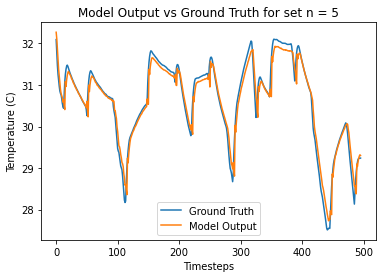

Epoch: {7} Total test loss for set 6 is 2.968172086781943


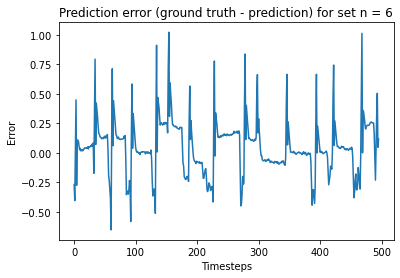

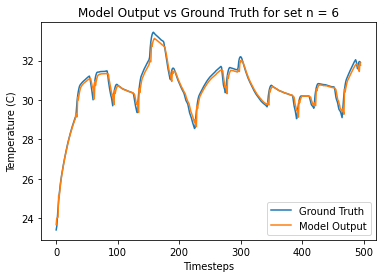

Epoch: {7} Total test loss for set 7 is 3.352218515836366


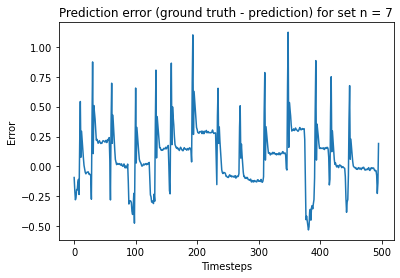

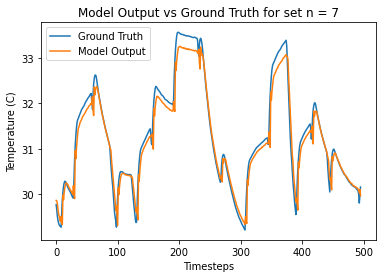

Epoch: {7} Total test loss for set 8 is 3.7848762100227846


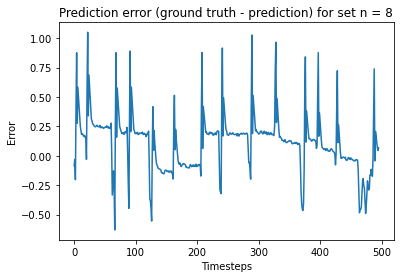

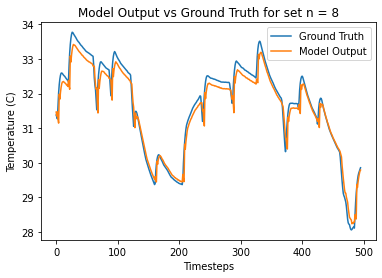

Epoch: {7} Total test loss for set 9 is 4.3229437398132005


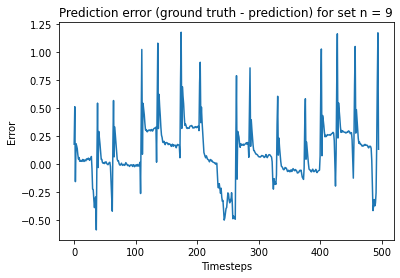

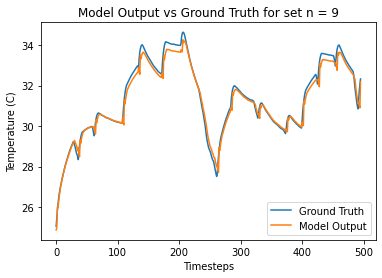

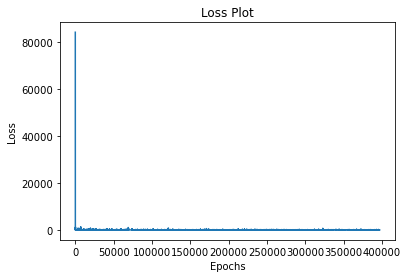

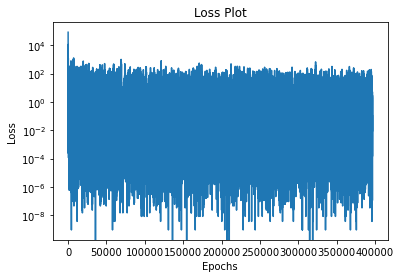

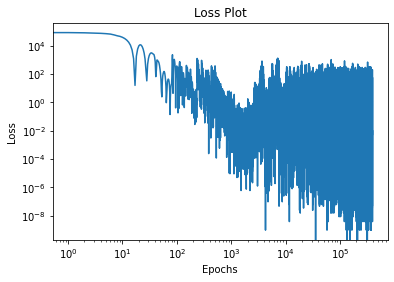

Train epoch: 8


KeyboardInterrupt: 

In [4]:
# Initialize the NN
model = NeuralNet(num_hidden_layers = 2, input_size = 8, hidden_size = 5, output_size = 1)#, device = device)
# Train the NN
train_and_test(model, train_data, test_data, optimizer = "Adam", num_epochs = 2)

# Testing the NN

### The following block only needs to be used if new data is needed

In [ ]:
# N = 10
# test_solutions_name = str(N) + "test_solutions.npy"
# test_F_ag_array_name = str(N) + "test_F_ag.npy"
# save_dir = "./saved"
# os.makedirs (save_dir, exist_ok=True)


# test_random_inputs = generate_inputs (N)
# test_solutions, test_F_ag_array = generate_ode_data(test_random_inputs, num_timesteps=500)

# print ("="*50)
# print ("Saved: ")
# print (f"{test_solutions_name}: {test_solutions.shape}")
# print (f"{test_F_ag_array_name}: {test_F_ag_array.shape}")
# print ("="*50)

# # SAVE
# np.save (join(save_dir, test_solutions_name), test_solutions)
# np.save (join(save_dir, test_F_ag_array_name), test_F_ag_array)

# # PLOT
# plot_ode_solutions (test_solutions)
# plot_input_output(test_F_ag_array, test_solutions, N)

### Testing the NN

Total test loss for set n = 0 is 79.82047244617715


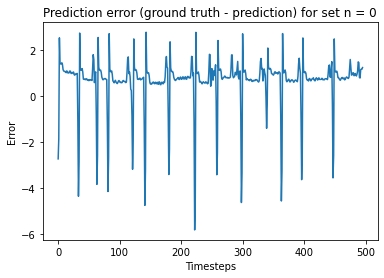

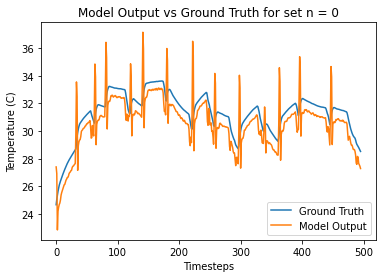

Total test loss for set n = 1 is 83.00097986421548


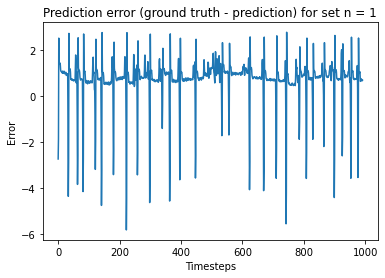

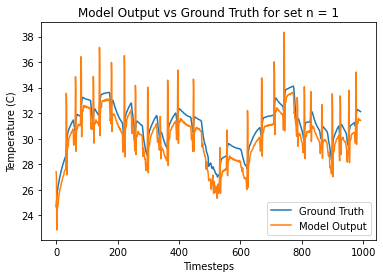

Total test loss for set n = 2 is 81.6814236381268


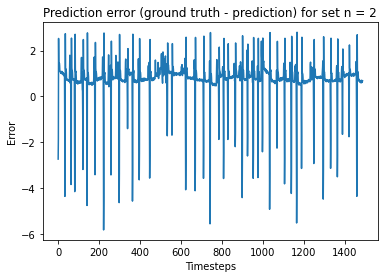

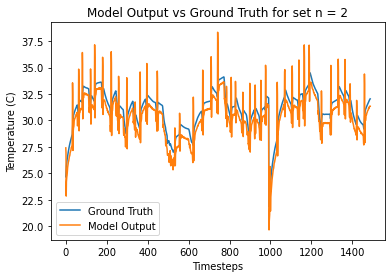

Total test loss for set n = 3 is 73.47646315154796


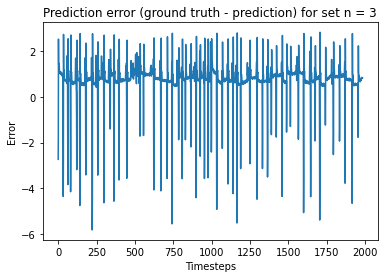

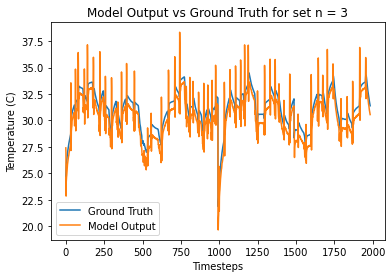

Total test loss for set n = 4 is 76.60570903368405


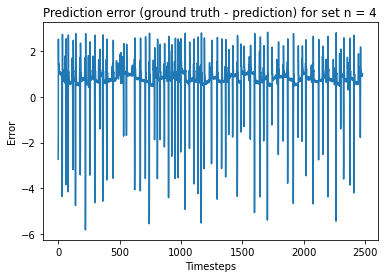

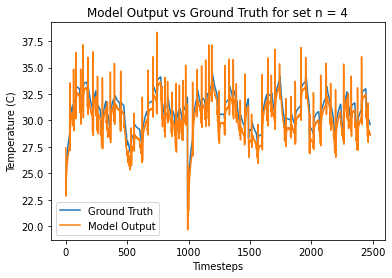

Total test loss for set n = 5 is 74.1474271757194


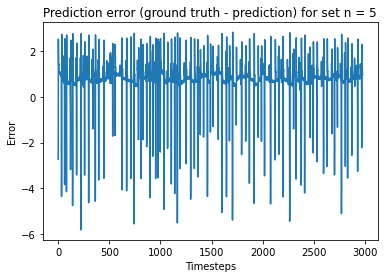

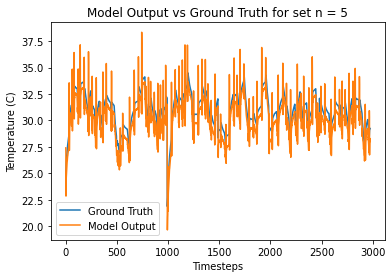

Total test loss for set n = 6 is 84.89249498691075


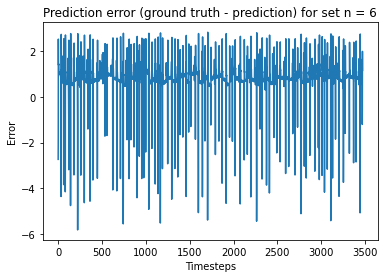

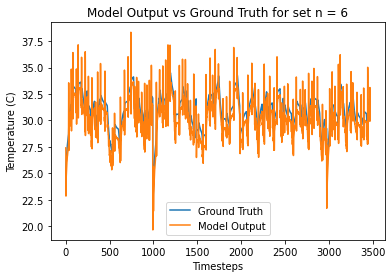

Total test loss for set n = 7 is 77.76889229865338


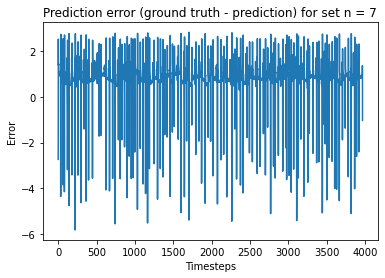

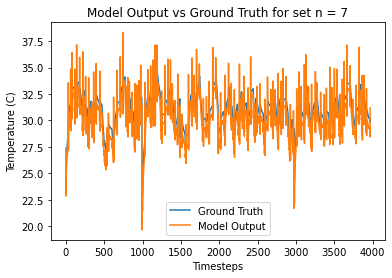

Total test loss for set n = 8 is 77.94223806040506


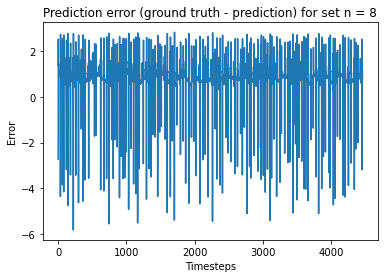

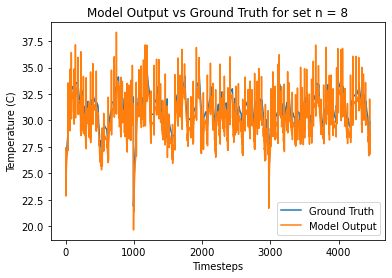

Total test loss for set n = 9 is 87.20057161949777


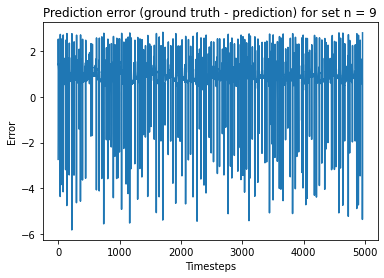

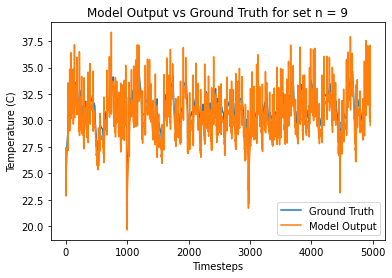

In [ ]:
test(model, test_data)